In [1]:
import pandas as pd

df = pd.read_csv('data/data.csv', encoding='unicode_escape')



In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df = df[(df['Quantity'] > 0 ) & (df['UnitPrice'] > 0)].copy()

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [12]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [13]:
df[df['InvoiceNo'].astype(str).str.startswith('C')].shape

(0, 9)

In [14]:
daily_revenue = (df.set_index('InvoiceDate')
                .resample('D')['Revenue']
                .sum()
                .rename('daily_revenue')
                .to_frame()
                )

In [15]:
daily_revenue.head(10)

,daily_revenue
InvoiceDate,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
2010-12-06,54830.46
2010-12-07,99618.20
2010-12-08,45389.98
2010-12-09,53586.18


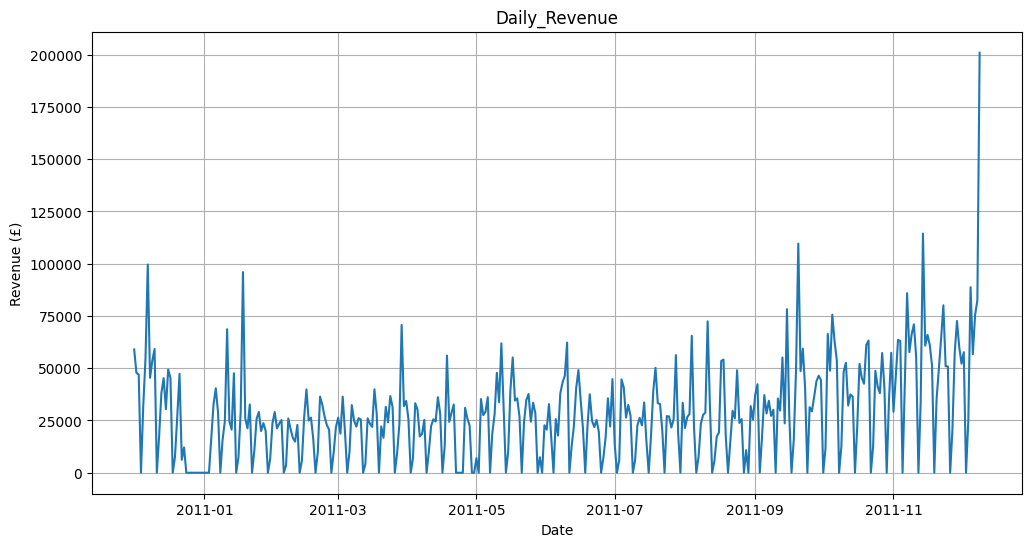

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue['daily_revenue'])
plt.title('Daily_Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.show()

In [17]:
daily_revenue.index.to_series().diff().value_counts().head()


InvoiceDate
1 days    373
Name: count, dtype: int64

In [18]:
daily_revenue.index.freq


<Day>

C:\Users\cihan\AppData\Local\Temp\ipykernel_31488\2719903940.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily_revenue.resample('M').sum()


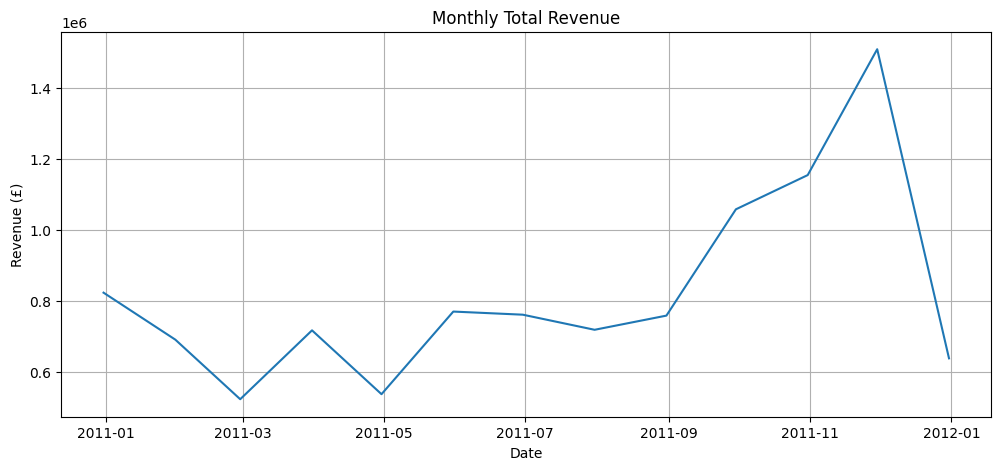

In [19]:
monthly = daily_revenue.resample('M').sum()
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly['daily_revenue'])
plt.title('Monthly Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.show()


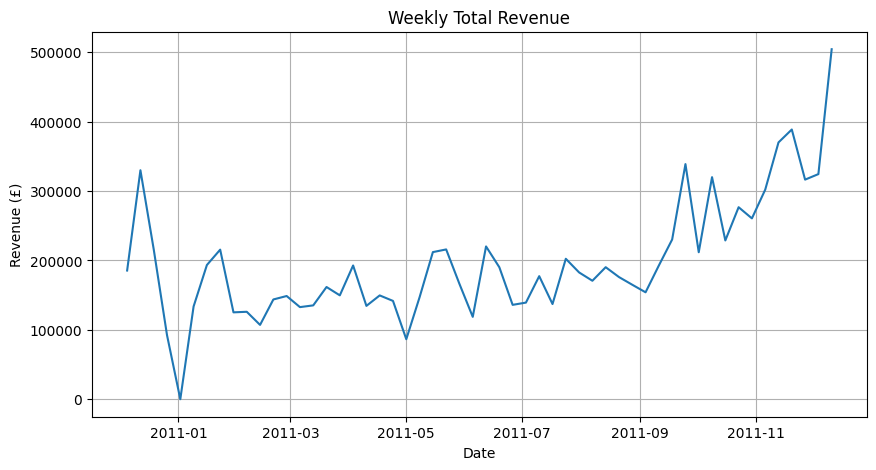

In [20]:
weekly = daily_revenue.resample('W').sum()
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly['daily_revenue'])
plt.title('Weekly Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.show()


In [21]:
daily_revenue.resample('M').sum()


C:\Users\cihan\AppData\Local\Temp\ipykernel_31488\1120949255.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_revenue.resample('M').sum()


,daily_revenue
InvoiceDate,
2010-12-31,823746.140
2011-01-31,691364.560
2011-02-28,523631.890
2011-03-31,717639.360
2011-04-30,537808.621
2011-05-31,770536.020
2011-06-30,761739.900
2011-07-31,719221.191
2011-08-31,759138.380


In [22]:
(minR, maxR) = daily_revenue.index.min(), daily_revenue.index.max()

In [23]:
minR, maxR

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

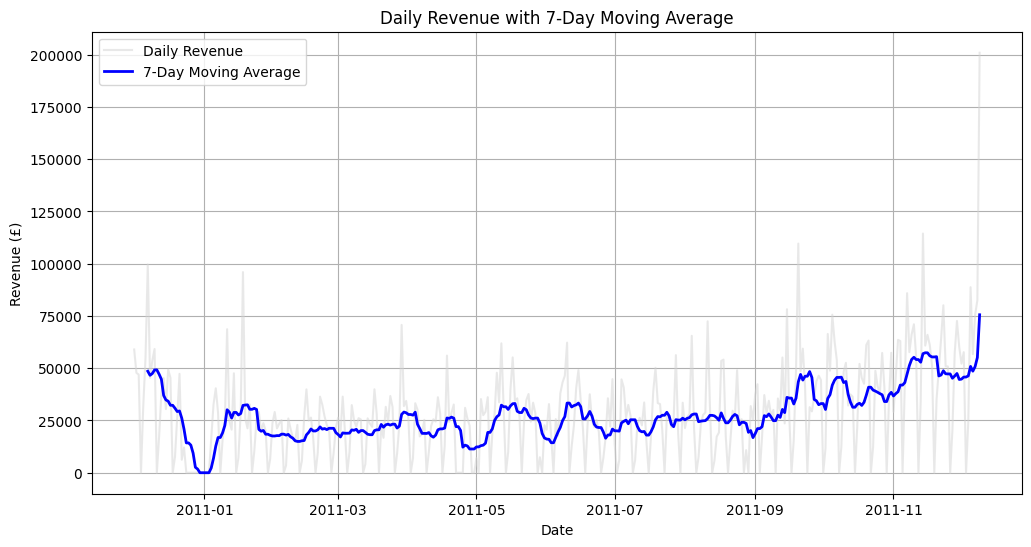

In [24]:
# 7-günlük hareketli ortalama (rolling mean)
daily_revenue['7d_mavg'] = daily_revenue['daily_revenue'].rolling(window=7).mean()

# Grafik çizimi
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue['daily_revenue'], 
         color='lightgray', alpha=0.5, label='Daily Revenue')
plt.plot(daily_revenue.index, daily_revenue['7d_mavg'], 
         color='blue', linewidth=2, label='7-Day Moving Average')
plt.title('Daily Revenue with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from prophet import Prophet

prophet_df = daily_revenue.reset_index()[['InvoiceDate', 'daily_revenue']]
prophet_df.columns = ['ds', 'y']

C:\Users\cihan\e-commerce_forecast\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
prophet_df.head()

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95


In [27]:
model = Prophet()

In [28]:
model.fit(prophet_df)

10:35:04 - cmdstanpy - INFO - Chain [1] start processing
10:35:05 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=90) 

In [30]:
forecast = model.predict(future)

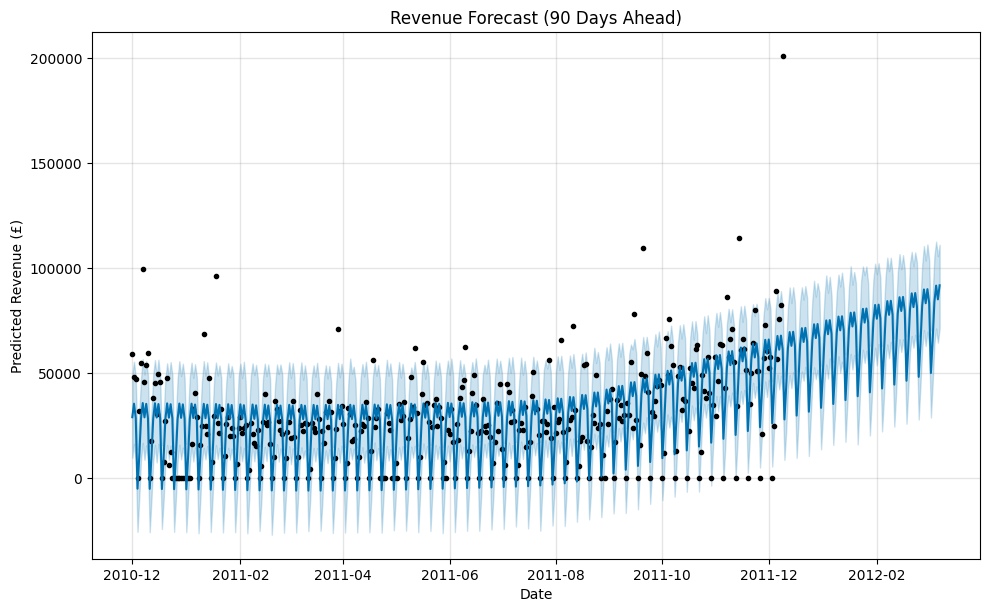

In [31]:
model.plot(forecast)
plt.title('Revenue Forecast (90 Days Ahead)')
plt.xlabel('Date')
plt.ylabel('Predicted Revenue (£)')
plt.show()

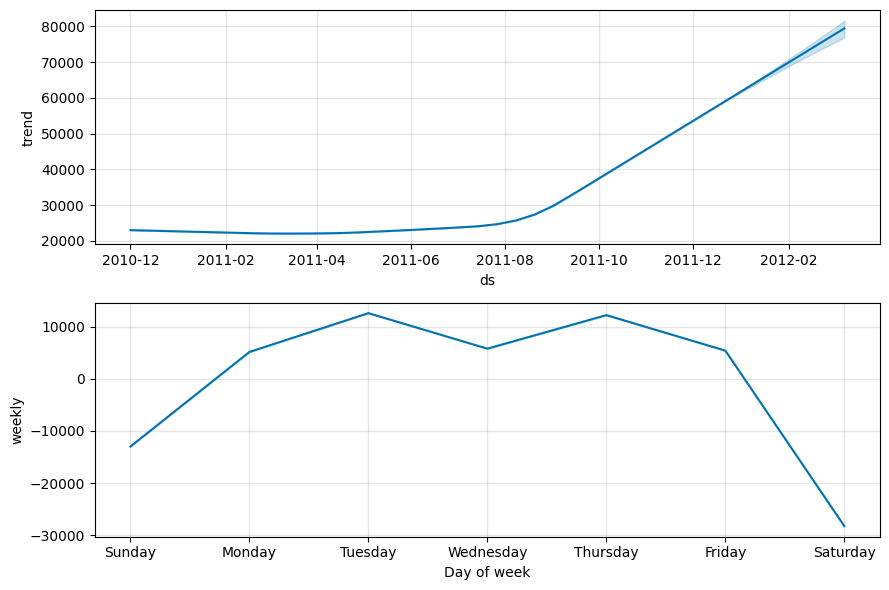

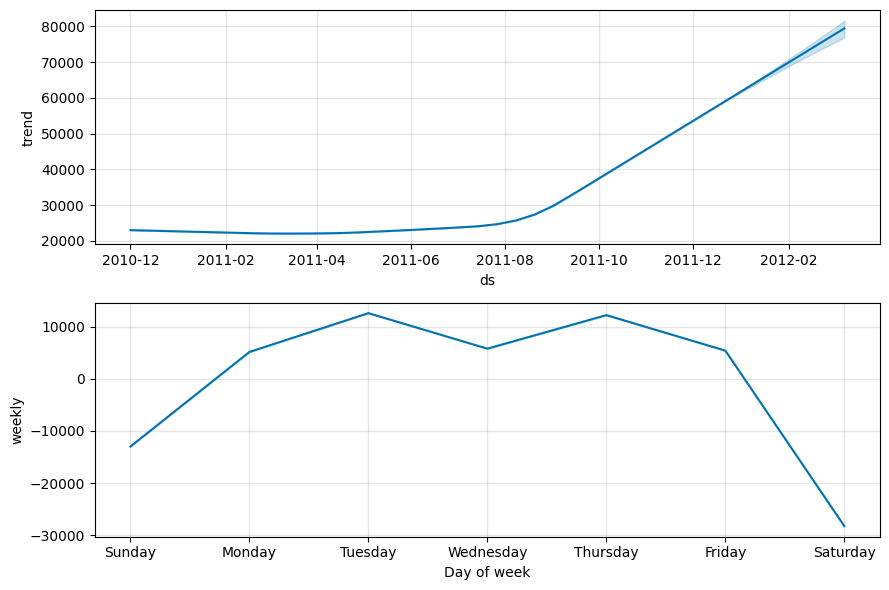

In [32]:
model.plot_components(forecast)

In [33]:
forecast[['ds','yhat_lower',  'yhat', 'yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
454,2012-02-28,70337.386102,89663.260375,110372.274616
455,2012-02-29,62767.005745,83117.545022,103452.592109
456,2012-03-01,69573.402349,89811.069350,111152.040227
457,2012-03-02,62890.725142,83266.357183,103711.808933
458,2012-03-03,28654.612801,49875.258926,70291.089163
459,2012-03-04,45022.536884,65406.417003,86769.462320
460,2012-03-05,63748.269155,83804.008164,105707.534693
461,2012-03-06,71071.822077,91507.710325,112475.870730
462,2012-03-07,64322.156592,84961.994972,105500.896589
463,2012-03-08,71096.126508,91655.519300,110983.020199


In [34]:
comparison = forecast[['ds','yhat_lower','yhat','yhat_upper']].merge(
    prophet_df, on='ds', how='left'
)

In [35]:
comparison

,ds,yhat_lower,yhat,yhat_upper,y
0,2010-12-01,9489.235638,28822.863616,48816.235155,58960.79
1,2010-12-02,16122.934590,35241.651470,55227.153866,47748.38
2,2010-12-03,7788.353750,28422.202829,47709.747406,46943.71
3,2010-12-04,-25800.487289,-5243.631902,13461.265147,0.00
4,2010-12-05,-9775.984473,10012.789701,29967.951828,31774.95
...,...,...,...,...,...
459,2012-03-04,45022.536884,65406.417003,86769.462320,NaN
460,2012-03-05,63748.269155,83804.008164,105707.534693,NaN
461,2012-03-06,71071.822077,91507.710325,112475.870730,NaN
462,2012-03-07,64322.156592,84961.994972,105500.896589,NaN


In [36]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

valid = comparison.dropna(subset=['y', 'yhat'])

mae = mean_absolute_error(valid['y'], valid['yhat'])
rmse = root_mean_squared_error(valid['y'], valid['yhat'])

print(f"MAE: £{mae:,.0f}")
print(f"RMSE: £{rmse:,.0f}")


MAE: £10,287
RMSE: £15,665


In [37]:
import sklearn
print(sklearn.__version__)

1.7.2


In [38]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error.__module__)

sklearn.metrics._regression


In [39]:
comparison.to_csv("data/comparison.csv", index=False)